# HR Analytics Project- Understanding the Attrition in HR

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Importing Data

In [1]:
import pandas as pd
HR=pd.read_csv("HR.csv",sep=",") #reading HR.csv file
HR.head() #Looking into top 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
HR.shape #Checking the shape of our data

(1470, 35)

In [3]:
HR.dtypes #Checking the datatype of each attribute

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Target variable i.e. Attrition is object so we'll use Classification to learn our model.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

# Exploratory Data Analysis

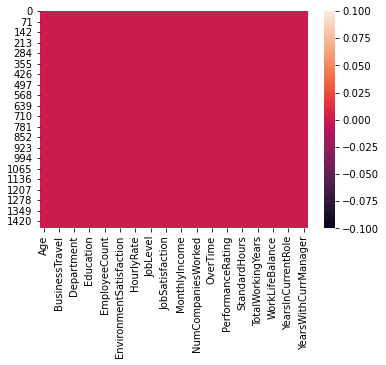

In [4]:
import seaborn as sns
sns.heatmap(HR.isnull()) #Looking for null values if any, in heatmap

## Univariate Analysis

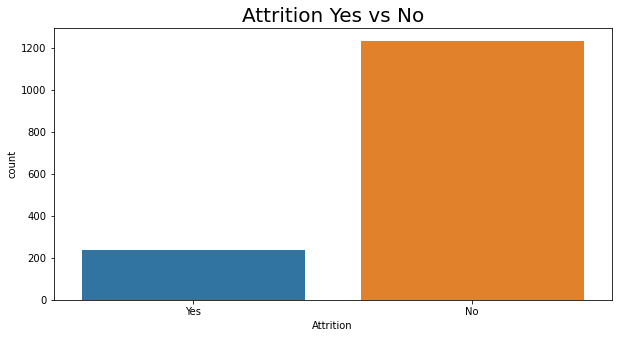

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.countplot(x="Attrition", data=HR)
plt.title("Attrition Yes vs No", fontsize = 20)
plt.show()

There will be 2 possibility of Attrition, it will be either Yes or No.

Number of Attrition No(1233) is too heigher than number of yes(237).

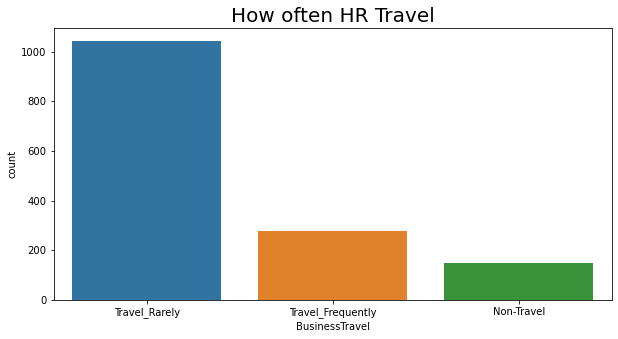

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(x="BusinessTravel", data=HR)
plt.title("How often HR Travel", fontsize = 20)
plt.show()

There will be 3 types of Business Travel i.e. HR will travel frequently, HR will travel less and HR will not Travel.

Travel_Rarely(1043) is too heigher, Travel_Frequently(277) is mediocre and Non-Travel(150) is least.

Here the conclusion is HR will Travel Rarely

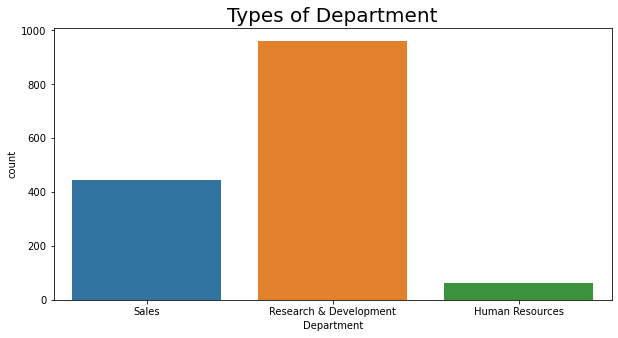

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(x="Department", data=HR)
plt.title("Types of Department", fontsize = 20)
plt.show()

There are 3 types of Department i.e. Sales, R&D and HR.

R&D(961) have more number of employees than HR(63) and Sales(446).

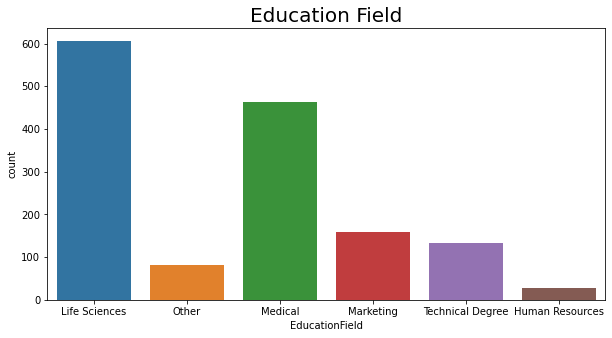

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(x="EducationField", data=HR)
plt.title("Education Field", fontsize = 20)
plt.show()

There are 6 types of Education Fields.

Life Science and Medical is way higher than other Education Field.

Human Resources have very low number of Education Field.

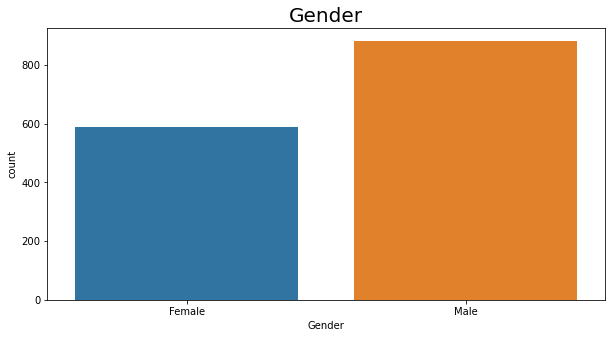

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x="Gender", data=HR)
plt.title("Gender", fontsize = 20)
plt.show()

882 Males are participated and 588 Females are participated in this HR data

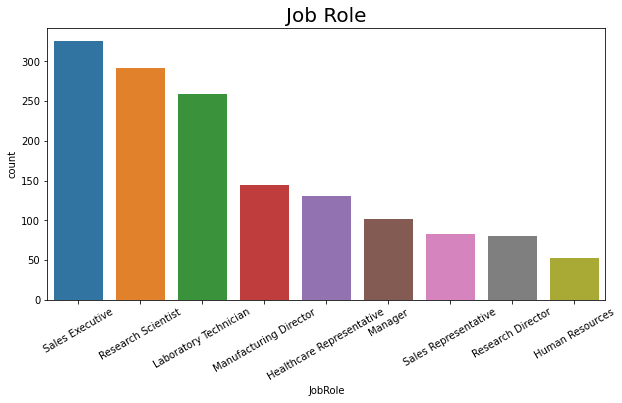

In [10]:
plt.figure(figsize = (10,5))
ax=sns.countplot(x="JobRole", data=HR)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Job Role", fontsize = 20)
plt.show()

9 types of Job Roles are available in this dataset, Where Sales Executive(326) have heighest number of employees and Human Resources have least number of employees(52)

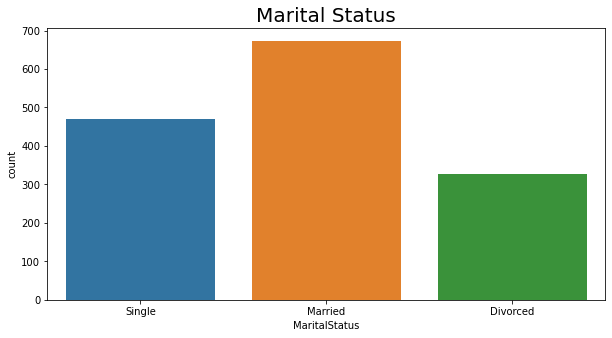

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(x="MaritalStatus", data=HR)
plt.title("Marital Status", fontsize = 20)
plt.show()

3 types of people are available here.

In that Most people are Married and very less people are Divorced.

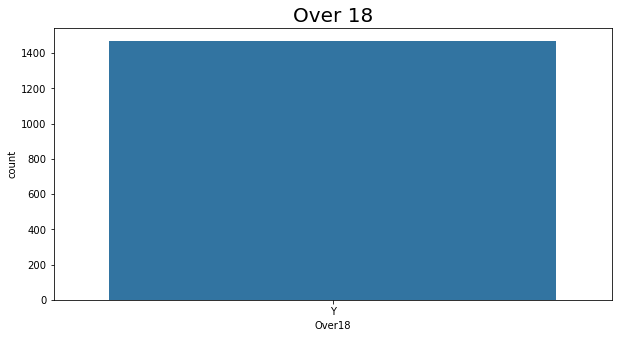

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(x="Over18", data=HR)
plt.title("Over 18", fontsize = 20)
plt.show()

All the Employees are above 18 year in their age

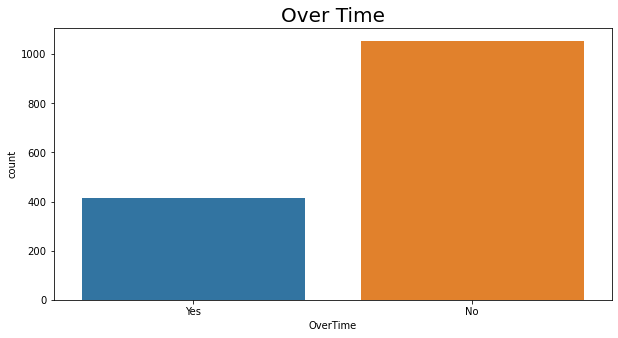

In [13]:
plt.figure(figsize = (10,5))
sns.countplot(x="OverTime", data=HR)
plt.title("Over Time", fontsize = 20)
plt.show()

Here we have 2 types of peoples in Overtime, Most of the People does not like overtime.

1054 people does not do Overtime, Where as 416 people do it.

## Bivariate Analysis

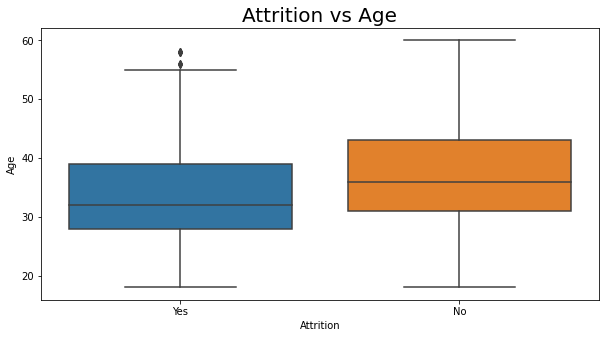

In [14]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Attrition', y = 'Age', data = HR)
plt.title("Attrition vs Age", fontsize = 20)
plt.show()

We can clearly see If age is heigh than person will not Leave the Job, where as If Age is less Person can leave the Job

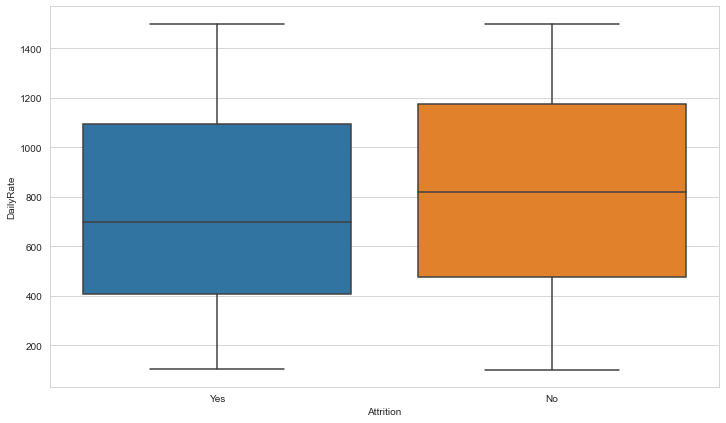

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="DailyRate",data=HR)

If the Daily Rate is High than Person will not leave the Job. If Daily Rate is less than person leave the job.

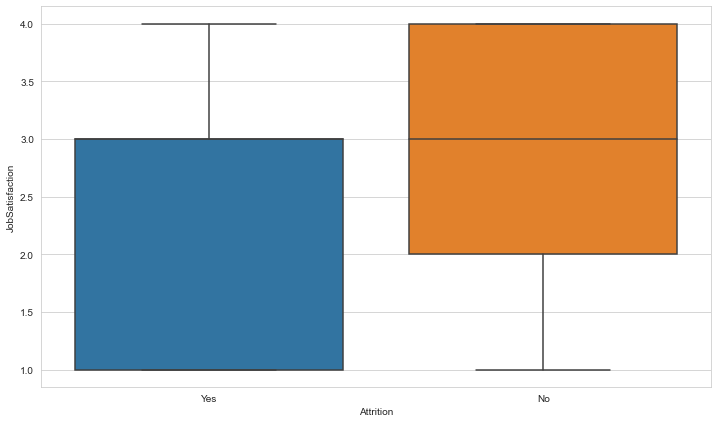

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="JobSatisfaction",data=HR)

If person is less Satisfied with his/her job than he/she leave it, Where as If His/Her Job Satisfation is high than they will not leave the job.

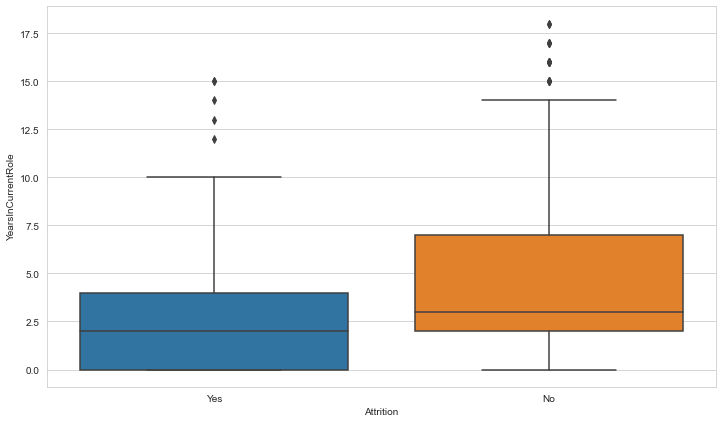

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="YearsInCurrentRole",data=HR)

Here can clearly see, If employee works on current role more than employee will not leave the job, where as if number of year spent on Current Role is less than employee leaves the job.

## Multi-Variate Analysis

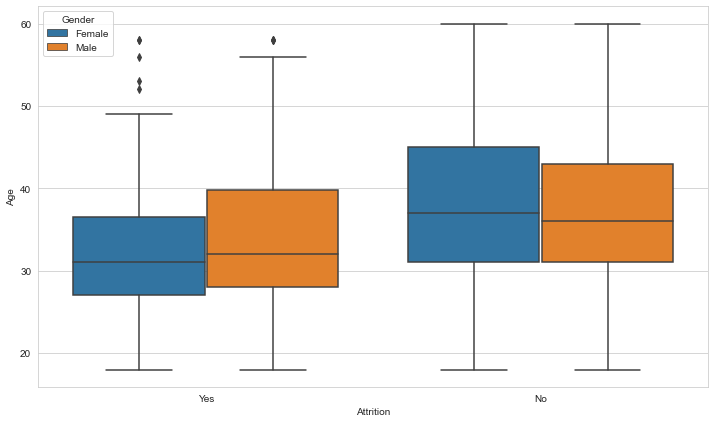

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="Age",hue="Gender",data=HR)

Here we can clearly see, If person is Female and age is less, there will be high possibility that she will leave the Job because the Attrition is Yes.

Where as person is Female and Age is heigh than she will not leave the Job becuase the Attrition is NO.

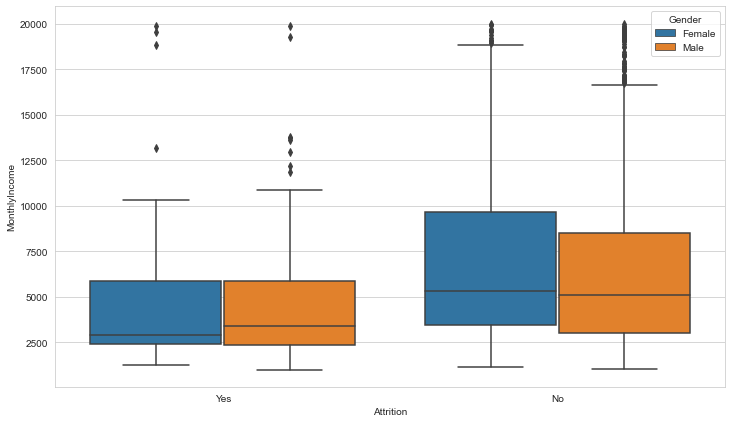

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize = (12,7))
sns.boxplot(x="Attrition", y="MonthlyIncome",hue="Gender",data=HR)

Here we can clearly see, If person is Monthly Income is less below 3000, there will be high possibility that person will leave the Job because the Attrition is Yes.

Where as Monthly Income is heigh more than 5000 then person will not leave the Job becuase the Attrition is NO.

# Data Cleaning

In [20]:
#Removing those columns which have only 1 value across all the rows, It will not help us in prediction
collist=HR.columns.values
for i in range(0,len(collist)):
    if ((len(pd.unique(HR[collist[i]]))) < 2):
        print("***************************************")
        print(HR[collist[i]].value_counts())
        HR.drop(collist[i], axis = 1, inplace = True)

***************************************
1    1470
Name: EmployeeCount, dtype: int64
***************************************
Y    1470
Name: Over18, dtype: int64
***************************************
80    1470
Name: StandardHours, dtype: int64


EmployeeCount, Over18 and Standard Hours have only 1 value across all the 1470 rows, So we dropped it.

In [21]:
HR.shape #Checking the shape of our data

(1470, 32)

# Removing Outliers and Skewness

In [22]:
#shuffling the dataset
#This will Shuffle our dataset and it will avoid biasness of prediction
HR = HR.sample(frac=1, random_state = 0)

In [23]:
#Reducing the skewness of Monthly Income using log
import numpy as np
HR['MonthlyIncome']=np.log(HR['MonthlyIncome'])

In [24]:
#In order to reduce Skewness of all the columns, using PowerTransformation
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in HR.columns:
    if HR[i].dtype != "object":
        if abs(HR.loc[:,i].skew())>0.55:
            HR.loc[:,i]=PT.fit_transform(HR.loc[:,i].values.reshape(-1,1))

Performed PowerTransformer to reduce Skewness of data

In [25]:
#Checking the Skewness of data
HR.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.007468
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobSatisfaction            -0.329672
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
YearsWithCurrManager       -0.067565
dtype: float64

All columns skewness is reduced except PerformanceRating because it's having Catagorical value only 3 and 4 across all the rows. That's why we didn't touch it.

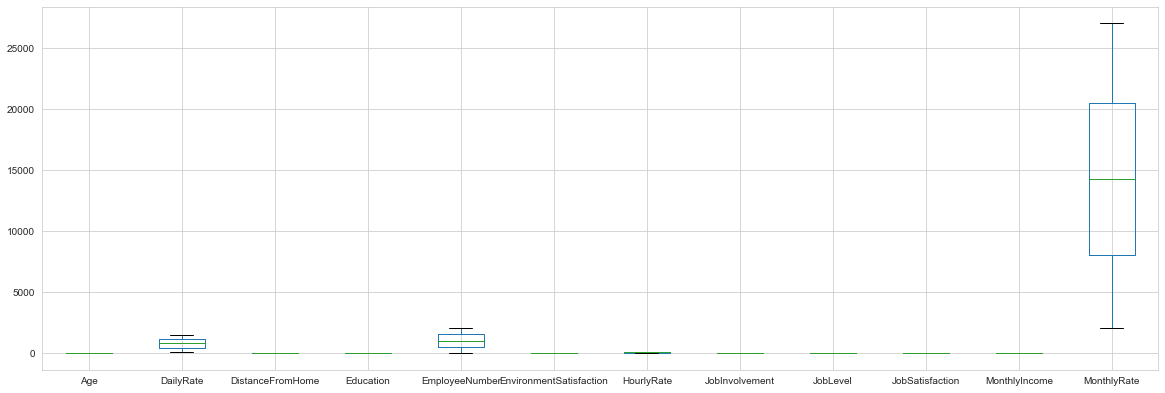

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
HR.iloc[:,:19].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

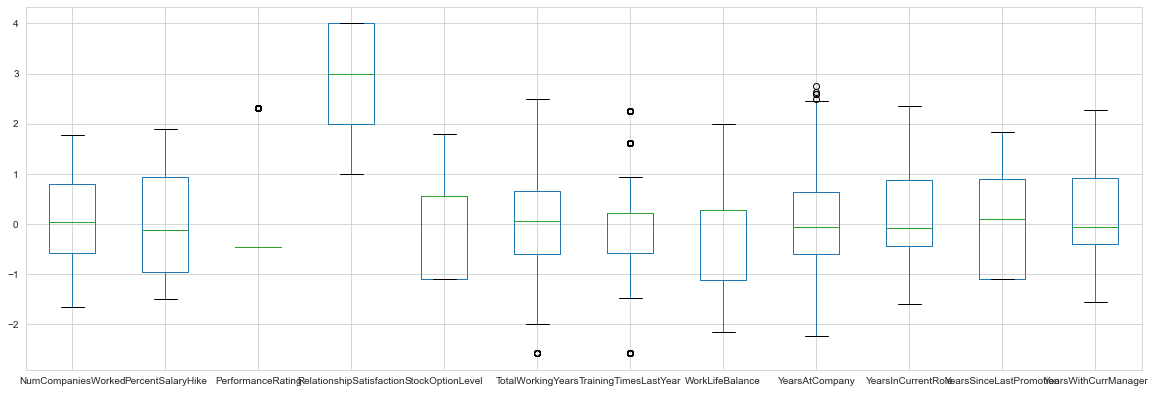

In [27]:
HR.iloc[:,19:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Label Encoding

In [28]:
label_list=list(HR.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#label_list = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in label_list:
    HR[i] = le.fit_transform(HR[i])

In [29]:
HR.head() #checking first 5 rows of data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,36,0,0,635,2,0.479509,4,3,592,2,...,-0.461767,4,-1.087933,0.052495,0.217384,-1.108624,0.762660,-0.089615,1.590412,0.909635
1091,33,0,2,575,1,1.503182,3,1,1545,4,...,-0.461767,4,-1.087933,-0.792958,-0.578785,0.276821,-0.066114,-0.089615,-1.094862,-0.406881
981,35,1,1,662,2,1.127721,4,2,1380,4,...,-0.461767,3,0.548969,-0.792958,-2.579073,-1.108624,-0.305280,-0.446645,0.905592,-0.406881
785,40,0,2,1492,1,1.247250,4,5,1092,1,...,2.308836,4,0.548969,0.547227,2.248381,0.276821,0.886011,1.390960,1.689587,-0.865082
1332,29,1,1,459,1,1.456094,2,1,1868,4,...,2.308836,2,-1.087933,-1.988249,0.217384,-1.108624,-1.440442,-1.596434,0.096854,-1.550156


In [30]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(HR))
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


No outliers in our data

In [31]:
#Checking the min max values of each column
HR.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,36.923810,0.161224,1.607483,802.485714,1.260544,-3.206052e-17,2.912925,2.247619,1024.865306,2.721769,...,-0.035811,2.712245,6.661338e-17,2.379238e-16,1.748412e-16,-3.789863e-16,-1.468213e-16,-1.537697e-16,1.652495e-16,1.253721e-17
std,9.135373,0.367863,0.665455,403.509100,0.527792,1.000340e+00,1.024165,1.331369,602.024335,1.093082,...,0.999699,1.081209,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,18.000000,0.000000,0.000000,102.000000,0.000000,-1.494085e+00,1.000000,0.000000,1.000000,1.000000,...,-0.461767,1.000000,-1.087933e+00,-2.565715e+00,-2.579073e+00,-2.144446e+00,-2.229592e+00,-1.596434e+00,-1.094862e+00,-1.550156e+00
25%,30.000000,0.000000,1.000000,465.000000,1.000000,-1.031215e+00,2.000000,1.000000,491.250000,2.000000,...,-0.461767,2.000000,-1.087933e+00,-5.920630e-01,-5.787848e-01,-1.108624e+00,-5.918447e-01,-4.466451e-01,-1.094862e+00,-4.068812e-01
50%,36.000000,0.000000,2.000000,802.000000,1.000000,1.053155e-01,3.000000,2.000000,1020.500000,3.000000,...,-0.461767,3.000000,5.489691e-01,5.249457e-02,2.173842e-01,2.768212e-01,-6.611444e-02,-8.961473e-02,9.685416e-02,-5.300032e-02
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,8.464235e-01,4.000000,3.000000,1555.750000,4.000000,...,-0.461767,4.000000,5.489691e-01,6.559876e-01,2.173842e-01,2.768212e-01,6.288288e-01,8.838880e-01,9.055925e-01,9.096349e-01
max,60.000000,1.000000,2.000000,1499.000000,2.000000,1.675323e+00,5.000000,5.000000,2068.000000,4.000000,...,2.308836,4.000000,1.785018e+00,2.501157e+00,2.248381e+00,1.998177e+00,2.753392e+00,2.361135e+00,1.826888e+00,2.264669e+00


Few coulmns have very high values and many coulmns have less values. So we need to performe Scaling 

# Seprate independent variable and target variable

In [32]:
y = HR['Attrition']

In [33]:
x = HR.drop("Attrition", axis=1)

# Scaling

In [34]:
#Using Standard Scaler to perform Scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_HR=scaler.fit_transform(x)
scale_HR

array([[-0.10115885, -2.41643713, -0.41521421, ..., -0.08961473,
         1.59041241,  0.90963491],
       [-0.42966441,  0.59004834, -0.56396034, ..., -0.08961473,
        -1.09486169, -0.40688122],
       [-0.2106607 , -0.91319439, -0.34827845, ..., -0.44664507,
         0.90559245, -0.40688122],
       ...,
       [ 0.66535411,  0.59004834,  0.93341741, ...,  1.23494119,
         1.52831769,  1.09011006],
       [ 0.11784485,  0.59004834, -1.32504473, ..., -1.59643394,
        -1.09486169, -0.86508185],
       [ 0.33684855,  0.59004834, -0.35819486, ..., -1.59643394,
        -1.09486169, -1.55015588]])

In [35]:
scale_HR.shape #Checking the shape of data

(1470, 31)

In [36]:
#Setting up the coulumns after Scaling
x = pd.DataFrame(scale_HR, index=x.index, columns=x.columns)

In [37]:
x.head() #Checking first 5 rows of the data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,-0.101159,-2.416437,-0.415214,1.401512,0.479509,1.061787,0.565311,-0.719261,-0.660531,0.816497,...,-0.426230,1.191438,-1.087933,0.052495,0.217384,-1.108624,0.762660,-0.089615,1.590412,0.909635
1091,-0.429664,0.590048,-0.563960,-0.493817,1.503182,0.085049,-0.937414,0.864270,1.169781,0.816497,...,-0.426230,1.191438,-1.087933,-0.792958,-0.578785,0.276821,-0.066114,-0.089615,-1.094862,-0.406881
981,-0.210661,-0.913194,-0.348278,1.401512,1.127721,1.061787,-0.186052,0.590102,1.169781,-1.224745,...,-0.426230,0.266233,0.548969,-0.792958,-2.579073,-1.108624,-0.305280,-0.446645,0.905592,-0.406881
785,0.336849,0.590048,1.709376,-0.493817,1.247250,1.061787,2.068035,0.111553,-1.575686,0.816497,...,2.346151,1.191438,0.548969,0.547227,2.248381,0.276821,0.886011,1.390960,1.689587,-0.865082
1332,-0.867672,-0.913194,-0.851536,-0.493817,1.456094,-0.891688,-0.937414,1.400976,1.169781,0.816497,...,2.346151,-0.658973,-1.087933,-1.988249,0.217384,-1.108624,-1.440442,-1.596434,0.096854,-1.550156


# Finding Best Random State

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.9160997732426304  on Random_state  21


# Train Test Split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [40]:
#importing all the required libraries to find best Algorithm
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [41]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("*******************************************************************************")

*******************************************************************************
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
accuracy score of -> LogisticRegression()
0.9160997732426304
[[372   5]
 [ 32  32]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       377
           1       0.86      0.50      0.63        64

    accuracy                           0.92       441
   macro avg       0.89      0.74      0.79       441
weighted avg       0.91      0.92      0.91       441

[0.8877551  0.87414966 0.88095238 0.87755102 0.86054422]
0.8761904761904761
Difference between Accuracy score and cross validatio score is -  0.03990929705215429
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
*******************************************************************************
*******************************************************************************
|||||||||||||||||||||||||||

Logistic Regression have height Accuracy with Cross validation score i.e. 91.60%

# Hyper Parameter Tuning

In [42]:
#import the randomized search CV
from sklearn.model_selection import GridSearchCV
parameters = {'penalty' :['l2', 'elasticnet', 'none'],'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [43]:
clf = GridSearchCV(LogisticRegression(), parameters, cv=8)
clf.fit(x_train, y_train)
clf.best_params_  #Best parameters

{'penalty': 'none', 'solver': 'newton-cg'}

In [44]:
clf_pred=clf.best_estimator_.predict(x_test)

In [45]:
accuracy_score(y_test,clf_pred)

0.9160997732426304

#### Our Model learnt 91.60%

In [46]:
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.9160997732426304
[[371   6]
 [ 31  33]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       377
           1       0.85      0.52      0.64        64

    accuracy                           0.92       441
   macro avg       0.88      0.75      0.80       441
weighted avg       0.91      0.92      0.91       441



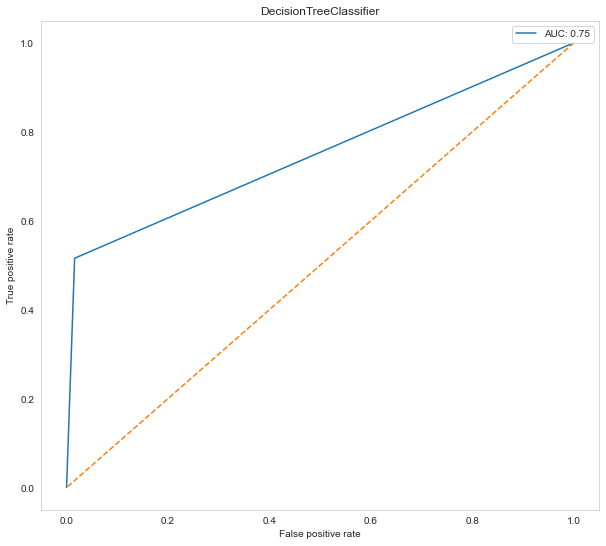

In [47]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

# Boosting

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.8820861678004536
[[374   3]
 [ 49  15]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       377
           1       0.83      0.23      0.37        64

    accuracy                           0.88       441
   macro avg       0.86      0.61      0.65       441
weighted avg       0.88      0.88      0.85       441



In [49]:
score=cross_val_score(GBC,x,y,cv=8)
print(score)
print(score.mean())

[0.84782609 0.89130435 0.875      0.8423913  0.86956522 0.875
 0.86338798 0.85245902]
0.8646167438821573


Gradient Boosting Classifier is not working as effective as Logistic Regression is Working.

# Saving the model

In [50]:
import joblib
joblib.dump(clf.best_estimator_,"PJ2_HR.obj")
RF_from_joblib=joblib.load('PJ2_HR.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [51]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
Predicted,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Original,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
